In [10]:
# Imports 
library("openxlsx")
library("readxl")
library("ggplot2")
library("tidyr")
library("dplyr")

In [21]:
# Read the data
data <- read_excel("econ.xlsx")

# Convert the tempo column to a Date object
data$tempo <- as.Date(data$tempo, format = "%y-%m-%d")

# Extract the year from the Date object
data$year <- format(data$tempo, "%Y")

# Filter data for years greater than or equal to 1968
data_filtered <- data[data$year >= 1968,]

X1 <- data_filtered$gcp
X2 <- data_filtered$ndesemp

In [35]:
# transformação de dados
z_transform <- function(x){
  (x - mean(x))/sd(x)
}

z_gcp <- z_transform(X1)
z_ndesemp <- z_transform(X2)

`geom_smooth()` using formula = 'y ~ x'


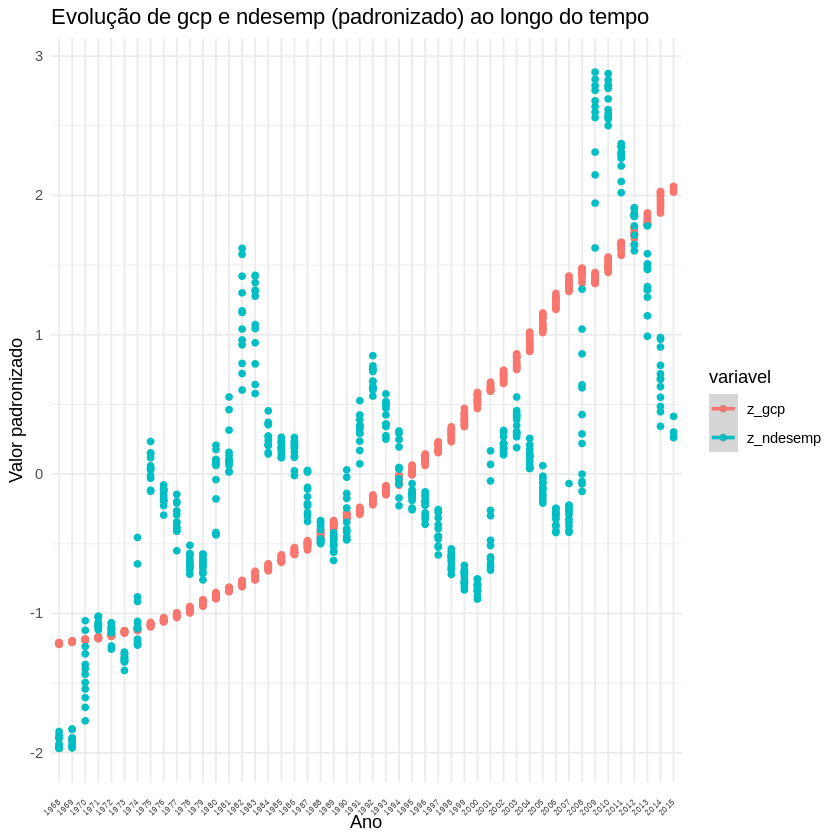

In [36]:
# Create a new data frame with transformed data
df <- data.frame(tempo = data_filtered$tempo, year = data_filtered$year, z_gcp, z_ndesemp)

# Create a long format data frame for ggplot
df_long <- gather(df, key = "variavel", value = "valor", -tempo, -year)

# Create a ggplot with the evolution of the two variables over time
p <- ggplot(df_long, aes(x = year, y = valor, color = variavel)) + geom_point() + geom_smooth(method = "lm") + labs(title = "Evolução de gcp e ndesemp (padronizado) ao longo do tempo", x = "Ano", y = "Valor padronizado") + theme_minimal() +
     theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 1, size = 5))

p

